In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure

mario_image_path = 'mario.png'
mario_image = cv2.imread(mario_image_path, cv2.IMREAD_COLOR)
cv2_imshow(mario_image)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
def contrast_stretching(img, m1, m2):

    img = img.astype('float')

    min_val = np.min(img)
    max_val = np.max(img)
    stretched_img = (img - min_val) * ((m2 - m1) / (max_val - min_val)) + m1

    stretched_img = np.clip(stretched_img, 0, 255).astype('uint8')
    return stretched_img

In [ ]:
def global_histogram_equalization(img):

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    equalized_img = exposure.equalize_hist(gray_img)

    equalized_img = cv2.cvtColor((equalized_img * 255).astype('uint8'), cv2.COLOR_GRAY2BGR)
    return equalized_img

In [ ]:
def local_histogram_equalization(img):

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    equalized_img = exposure.equalize_adapthist(gray_img, clip_limit=0.03)

    equalized_img = cv2.cvtColor((equalized_img * 255).astype('uint8'), cv2.COLOR_GRAY2BGR)
    return equalized_img

(-0.5, 341.5, 258.5, -0.5)

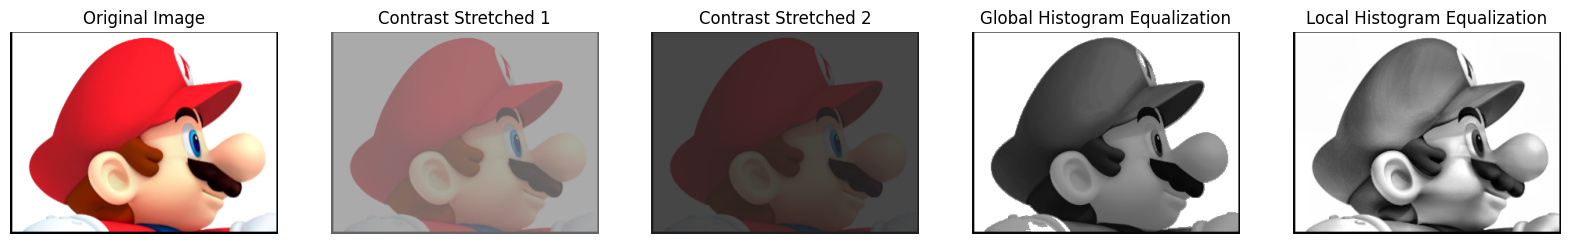

In [ ]:
# Task a
M1, M2 = 100, 170
stretched_image1 = contrast_stretching(mario_image, M1, M2)

# Task b
M1, M2 = 30, 70
stretched_image2 = contrast_stretching(mario_image, M1, M2)

# Task c
global_equalized_image = global_histogram_equalization(mario_image)
local_equalized_image = local_histogram_equalization(mario_image)


# Task d

fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].imshow(cv2.cvtColor(mario_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(stretched_image1, cv2.COLOR_BGR2RGB))
ax[1].set_title('Contrast Stretched 1')
ax[1].axis('off')
ax[2].imshow(cv2.cvtColor(stretched_image2, cv2.COLOR_BGR2RGB))
ax[2].set_title('Contrast Stretched 2')
ax[2].axis('off')
ax[3].imshow(cv2.cvtColor(global_equalized_image, cv2.COLOR_BGR2RGB))
ax[3].set_title('Global Histogram Equalization')
ax[3].axis('off')
ax[4].imshow(cv2.cvtColor(local_equalized_image, cv2.COLOR_BGR2RGB))
ax[4].set_title('Local Histogram Equalization')
ax[4].axis('off')